In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv",delimiter = ",",skip_header = 1)

In [17]:
# get x and y values
x_train = data_set[:150,0]
y_train = data_set[:150,1].astype(int)

# get x and y values
x_test = data_set[150:,0]
y_test = data_set[150:,1].astype(int)

In [15]:
# get number of samples
N = data_set.shape[0]

In [260]:
# determine the bin width and origin
bin_width = 0.37
origin = 1.5

In [244]:
# define the borders
maximum_value = 5.2
minimum_value = origin
data_interval = np.linspace(minimum_value, maximum_value, 371)
left_borders = np.arange(origin, maximum_value, bin_width)
right_borders = np.arange(origin+bin_width, maximum_value+bin_width, bin_width)

In [245]:
def regressogram(right_borders, left_borders, x_train, y_train):
    p_hat = np.asarray([np.sum(((left_borders[b] < x_train) & (x_train <= right_borders[b]))* y_train) / np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b])) for b in range(len(left_borders))])
    return p_hat

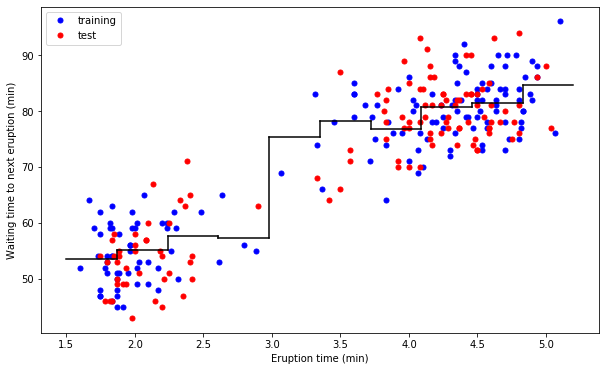

In [246]:
# calculate the regressogram and plot it as well as the training and test data points
g = regressogram(right_borders, left_borders, x_train, y_train)
plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, "b.", markersize = 10)
plt.plot(x_test, y_test, "r.", markersize = 10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"], loc ="upper left")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [g[b], g[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [g[b], g[b + 1]], "k-")
plt.show()

In [247]:
def rmse(y_test, y_pred):
    r = np.sqrt(np.sum((y_test-y_pred)**2) / len(y_test))
    return r

In [306]:
# b function in the cheat sheet which is used in calculation of y_pred
def b(x_test, x_train):
    for b in range(len(left_borders)):
        if (left_borders[b] < x_train) & (left_borders[b] < x_test) & (x_train <= right_borders[b]) & (x_test <= right_borders[b]):
            return 1
        
    return 0

In [320]:
# calculate the y_pred using the formula provided in the cheat sheet
total_num = 0
total_denom = 0
y_pred = np.array([])
for i in range(len(x_test)):
    for j in range (len(x_train)):
        numerator = b(x_test[i], x_train[j])* y_train[j]
        denominator = b(x_test[i], x_train[j])
        total_num += numerator
        total_denom += denominator
    
    y_pred = np.append(y_pred, total_num/total_denom)
    total_num = 0
    total_denom = 0

In [321]:
rmse1 = rmse(y_test , y_pred)
print(rmse1)

5.962617204275405


In [322]:
print("Regressogram => RMSE is {} when h is {}".format(rmse1,bin_width))

Regressogram => RMSE is 5.962617204275405 when h is 0.37


In [249]:
def running_mean_smoother(bin_width):
    p_hat = np.asarray([np.sum((((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) * y_train) / np.sum(((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) for x in data_interval])
    return p_hat

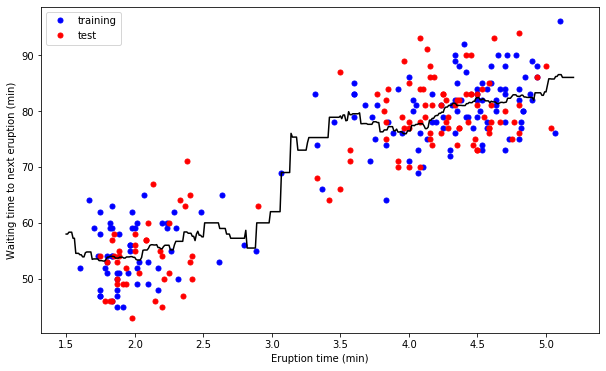

In [250]:
# calculate the running mean smoother and plot it as well as the training and test data points
g1 = running_mean_smoother(bin_width)
plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, "b.", markersize = 10)
plt.plot(x_test, y_test, "r.", markersize = 10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"], loc ="upper left")
plt.plot(data_interval, g1, "k-")
plt.show()

In [251]:
y_pred2 = np.asarray([np.sum((((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) * y_train) / np.sum(((x - 0.5 * bin_width) < x_train) & (x_train <= (x + 0.5 * bin_width))) for x in x_test])

In [252]:
rmse2 = rmse(y_test, y_pred2)
print(rmse2)

6.089003211720321


In [253]:
print("Running Mean Smoother => RMSE is {} when h is {}".format(rmse2,bin_width))

Running Mean Smoother => RMSE is 6.089003211720321 when h is 0.37


In [254]:
def kernal_smoother(bin_width):
    p_hat = np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train)/ np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in data_interval])
    return p_hat

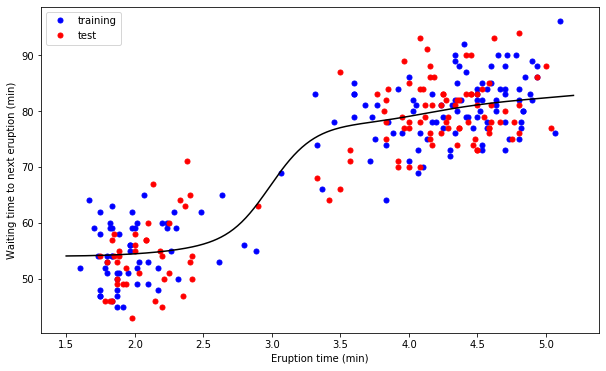

In [255]:
# calculate the kernal smoother and plot it as well as the training and test data points
g2 = kernal_smoother(bin_width)
plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, "b.", markersize = 10)
plt.plot(x_test, y_test, "r.", markersize = 10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"], loc ="upper left")
plt.plot(data_interval, g2, "k-")
plt.show()

In [256]:
y_pred3 = np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train)/ np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in x_test])

In [257]:
rmse3 = rmse(y_test, y_pred3)
print(rmse3)

5.874362846844968


In [258]:
print("Kernal Smoother => RMSE is {} when h is {}".format(rmse3,bin_width))

Kernal Smoother => RMSE is 5.874362846844968 when h is 0.37
